Installing python-louvain...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: python-louvain in /usr/local/lib/python3.11/dist-packages (0.16)

Requirement already satisfied: networkx in /usr/local/lib/python3.11/dist-packages (from python-louvain) (3.4.2)

Requirement already satisfied: numpy in /usr/local/lib/python3.11/dist-packages (from python-louvain) (2.0.2)

Installing scikit-learn...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: scikit-learn in /usr/local/lib/python3.11/dist-packages (1.6.1)

Requirement already satisfied: numpy>=1.19.5 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (2.0.2)

Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (1.15.2)

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (1.4.2)

Requirement already satisfied: threadpoolctl>=3.1.0 in /usr/local/lib/python3.11/dist-packages (from scikit-learn) (3.6.0)

Burushaski Words Community Detection Analysis
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully
Attempting to load file from: /content/drive/MyDrive/Roman_scripted_burushaski_words.xls
Successfully loaded file with 6158 rows
Columns: ['Burushaski Words in Roman burushaski Script']

First 5 rows of data:
  Burushaski Words in Roman burushaski Script
0                                           a
1                                          aa
2                                 aaÃ°ainÄ‡um
3                                      aaćaġá
4                                      aachan

Created graph with 6169 nodes and 26 edges
Connected 26 Burushaski words to world languages

--- Non-Overlapping Community Detection ---

Non-Overlapping Community Detection:

Running Louvain Algorithm...
Louvain - Modularity: 0.6206
Number of Communities: 6148

Running Girvan-Newman Algorithm...
Girvan-

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering - Modularity: 0.5370
Number of Communities: 308

Best Non-Overlapping Algorithm: Louvain
Modularity: 0.6206

--- Overlapping Community Detection ---

Overlapping Community Detection:

Running Clique Percolation Algorithm...
Error with k=2: 'aaã°ainä‡um'
Error with k=3: 'a'
Error with k=4: 'a'
Error with k=5: 'a'
Error with k=6: 'a'
Error with k=7: 'a'
Error with k=8: 'a'
Error with k=9: 'a'
Error with k=10: 'a'

Best Clique Percolation with k=0
Clique Percolation - Modularity: 0.0000
Number of Communities: 0
Top 10 Nodes by Community Membership:

Running Link Communities Algorithm...
Error in overlapping community detection: Distance matrix 'X' diagonal must be zero.

Visualizing communities from Louvain algorithm


<ipython-input-8-e2507342a33e>:421: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.savefig('/content/burushaski_communities.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


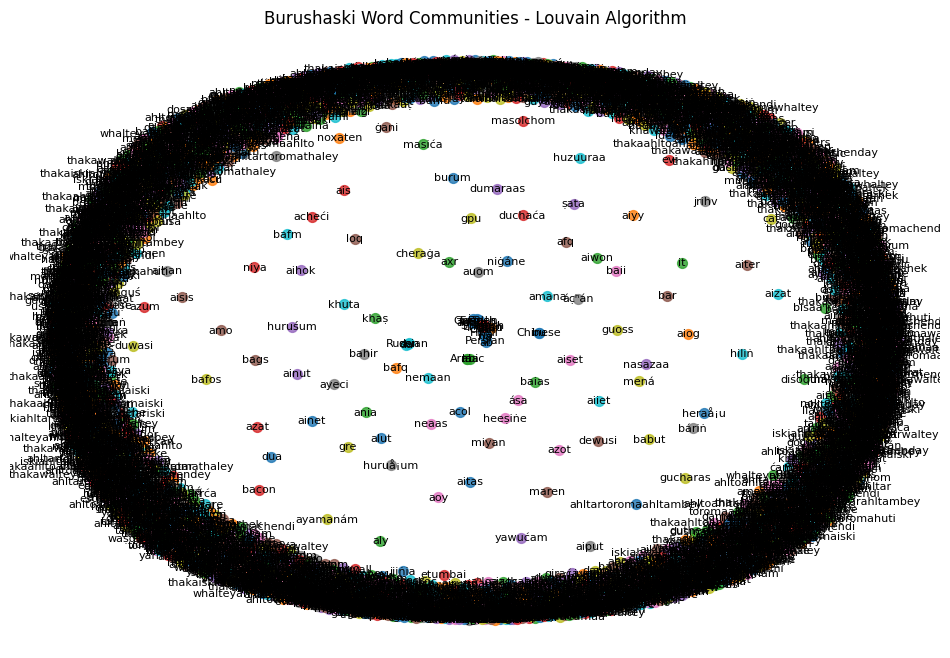

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
import community as community_louvain
import sklearn.cluster as cluster
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist, squareform

class CommunityDetectionAnalyzer:
    def __init__(self, graph):
        """
        Initialize the community detection analyzer with a networkx graph

        Args:
            graph (networkx.Graph): Input network graph
        """
        self.graph = graph

    def non_overlapping_community_detection(self):
        """
        Perform non-overlapping community detection using multiple algorithms

        Returns:
            dict: Results of community detection algorithms
        """
        print("\nNon-Overlapping Community Detection:")

        algorithms = {
            'Louvain': self._louvain_method,
            'Girvan-Newman': self._girvan_newman,
            'Label Propagation': self._label_propagation,
            'Spectral Clustering': self._spectral_clustering
        }

        results = {}

        for name, algorithm in algorithms.items():
            print(f"\nRunning {name} Algorithm...")
            communities, modularity = algorithm()

            results[name] = {
                'communities': communities,
                'modularity': modularity,
                'num_communities': len(communities)
            }

            print(f"{name} - Modularity: {modularity:.4f}")
            print(f"Number of Communities: {len(communities)}")

        best_algorithm = max(results, key=lambda x: results[x]['modularity'])
        print(f"\nBest Non-Overlapping Algorithm: {best_algorithm}")
        print(f"Modularity: {results[best_algorithm]['modularity']:.4f}")

        return results

    def _louvain_method(self):
        partition = community_louvain.best_partition(self.graph)
        communities = {}
        for node, community_id in partition.items():
            if community_id not in communities:
                communities[community_id] = []
            communities[community_id].append(node)
        modularity = community_louvain.modularity(partition, self.graph)
        return list(communities.values()), modularity

    def _girvan_newman(self):
        communities_generator = nx.community.girvan_newman(self.graph)
        top_level_communities = next(communities_generator)
        modularity = nx.community.modularity(self.graph, top_level_communities)
        return list(top_level_communities), modularity

    def _label_propagation(self):
        communities = list(nx.community.label_propagation_communities(self.graph))
        partition = {}
        for i, comm in enumerate(communities):
            for node in comm:
                partition[node] = i
        modularity = community_louvain.modularity(partition, self.graph)
        return communities, modularity

    def _spectral_clustering(self):
        adj_matrix = nx.to_numpy_array(self.graph)
        num_clusters = max(2, len(self.graph.nodes()) // 20)
        spectral = cluster.SpectralClustering(
            n_clusters=num_clusters,
            affinity='precomputed',
            assign_labels='discretize'
        )
        labels = spectral.fit_predict(adj_matrix)
        communities = {}
        for node, label in zip(self.graph.nodes(), labels):
            if label not in communities:
                communities[label] = []
            communities[label].append(node)
        partition = {node: label for node, label in zip(self.graph.nodes(), labels)}
        modularity = community_louvain.modularity(partition, self.graph)
        return list(communities.values()), modularity

    def overlapping_community_detection(self):
        print("\nOverlapping Community Detection:")

        algorithms = {
            'Clique Percolation': self._clique_percolation,
            'Link Communities': self._link_communities,
            'Ego Network': self._ego_network_communities,
            'k-core Decomposition': self._k_core_communities
        }

        results = {}

        for name, algorithm in algorithms.items():
            print(f"\nRunning {name} Algorithm...")
            communities, modularity = algorithm()

            node_community_count = {}
            for comm in communities:
                for node in comm:
                    if node not in node_community_count:
                        node_community_count[node] = 0
                    node_community_count[node] += 1

            ranked_nodes = sorted(
                node_community_count.items(),
                key=lambda x: x[1],
                reverse=True
            )

            results[name] = {
                'communities': communities,
                'modularity': modularity,
                'num_communities': len(communities),
                'node_community_count': node_community_count,
                'ranked_nodes': ranked_nodes
            }

            print(f"{name} - Modularity: {modularity:.4f}")
            print(f"Number of Communities: {len(communities)}")
            print("Top 10 Nodes by Community Membership:")
            for node, count in ranked_nodes[:10]:
                print(f"Node: {node}, Communities: {count}")

        best_algorithm = max(results, key=lambda x: results[x]['modularity'])
        print(f"\nBest Overlapping Algorithm: {best_algorithm}")
        print(f"Modularity: {results[best_algorithm]['modularity']:.4f}")

        return results

    def _clique_percolation(self, max_k=10):
        best_communities = None
        best_modularity = float('-inf')
        best_k = 0

        for k in range(2, min(max_k + 1, len(self.graph.nodes()))):
            try:
                communities = list(nx.community.k_clique_communities(self.graph, k))
                partition = {}
                for i, comm in enumerate(communities):
                    for node in comm:
                        partition[node] = i
                modularity = community_louvain.modularity(partition, self.graph)

                if modularity > best_modularity:
                    best_modularity = modularity
                    best_communities = communities
                    best_k = k

                print(f"k={k}: Modularity = {modularity:.4f}")

            except Exception as e:
                print(f"Error with k={k}: {e}")

        print(f"\nBest Clique Percolation with k={best_k}")
        if best_communities is None:
            # If no valid communities were found, return an empty list
            return [], 0.0
        return best_communities, best_modularity

    def _link_communities(self):
        nodes = list(self.graph.nodes())
        n = len(nodes)
        similarity_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(i+1, n):
                neighbors_i = set(self.graph.neighbors(nodes[i]))
                neighbors_j = set(self.graph.neighbors(nodes[j]))
                shared_neighbors = len(neighbors_i & neighbors_j)
                total_neighbors = len(neighbors_i | neighbors_j)
                similarity = shared_neighbors / total_neighbors if total_neighbors > 0 else 0
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity

        linkage_matrix = linkage(squareform(1 - similarity_matrix), method='average')
        num_clusters = max(2, len(nodes) // 20)
        clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

        communities = {}
        for node, cluster_id in zip(nodes, clusters):
            if cluster_id not in communities:
                communities[cluster_id] = []
            communities[cluster_id].append(node)

        partition = {node: cluster for node, cluster in zip(nodes, clusters)}
        modularity = community_louvain.modularity(partition, self.graph)

        return list(communities.values()), modularity

    def _ego_network_communities(self, threshold=0.5):
        communities = []
        for node in self.graph.nodes():
            ego_graph = nx.ego_graph(self.graph, node)
            ego_communities = list(nx.community.label_propagation_communities(ego_graph))
            for comm in ego_communities:
                if len(comm) / len(ego_graph.nodes()) >= threshold:
                    communities.append(comm)

        unique_communities = []
        for comm in communities:
            if comm not in unique_communities:
                unique_communities.append(comm)

        partition = {}
        for i, comm in enumerate(unique_communities):
            for node in comm:
                partition[node] = i
        modularity = community_louvain.modularity(partition, self.graph)
        return unique_communities, modularity

    def _k_core_communities(self, max_k=5):
        communities = []
        for k in range(2, min(max_k + 1, len(self.graph.nodes()))):
            k_core = nx.k_core(self.graph, k)
            k_communities = list(nx.community.label_propagation_communities(k_core))
            communities.extend(k_communities)

        unique_communities = []
        for comm in communities:
            if comm not in unique_communities:
                unique_communities.append(comm)

        partition = {}
        for i, comm in enumerate(unique_communities):
            for node in comm:
                partition[node] = i
        modularity = community_louvain.modularity(partition, self.graph)
        return unique_communities, modularity

def load_burushaski_data(file_path):
    """
    Load Burushaski words from Excel file and return as DataFrame

    Args:
        file_path (str): Path to the Excel file

    Returns:
        pandas.DataFrame: DataFrame containing the Burushaski words
    """
    try:
        print(f"Attempting to load file from: {file_path}")
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File not found at: {file_path}")
            return None

        # Try to load the Excel file
        df = pd.read_excel(file_path)
        print(f"Successfully loaded file with {len(df)} rows")
        print(f"Columns: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

def create_burushaski_graph(df, world_languages=None):
    """
    Create a graph connecting Burushaski words to world languages

    Args:
        df (pandas.DataFrame): DataFrame containing Burushaski words
        world_languages (dict, optional): Dictionary mapping language names to their word sets

    Returns:
        networkx.Graph: Graph representation of Burushaski words connected to world languages
    """
    G = nx.Graph()

    # First, let's examine the structure to determine the best way to create a graph
    print("\nFirst 5 rows of data:")
    print(df.head())

    # Get the column containing Burushaski words
    word_column = df.columns[0]  # Assuming first column contains Burushaski words

    # If world_languages not provided, create a simplified version with common languages
    if world_languages is None:
        # Create a dictionary of world languages with some common words for demonstration
        world_languages = {
            "English": {"a", "go", "in", "man", "woman", "day", "no", "yes", "water", "fire", "aa", "chan"},
            "Spanish": {"a", "si", "no", "agua", "fuego", "dia", "hombre", "mujer", "aa"},
            "French": {"a", "oui", "non", "eau", "feu", "jour", "homme", "femme"},
            "German": {"a", "ja", "nein", "wasser", "feuer", "tag", "mann", "frau"},
            "Russian": {"da", "nyet", "voda", "ogon", "den", "muzhchina", "zhenshchina"},
            "Arabic": {"na'am", "la", "ma", "naar", "yaum", "rajul", "imraa"},
            "Hindi": {"ha", "na", "pani", "aag", "din", "aadmi", "aurat", "aa", "chan"},
            "Chinese": {"shi", "bu", "shui", "huo", "ri", "nan", "nü"},
            "Urdu": {"han", "nahi", "pani", "aag", "din", "admi", "aurat", "aa"},
            "Persian": {"bale", "na", "ab", "atash", "rooz", "mard", "zan"},
            "Turkish": {"evet", "hayır", "su", "ateş", "gün", "adam", "kadın", "a"},
        }

    # Add all Burushaski words as nodes
    burushaski_words = df[word_column].astype(str).str.lower().unique()
    G.add_nodes_from(burushaski_words, type='word', language='Burushaski')

    # Add language nodes
    for language in world_languages.keys():
        G.add_node(language, type='language')

    # Create edges between Burushaski words and languages if the word appears in that language
    edge_count = 0
    for word in burushaski_words:
        word_lower = word.lower().strip()
        for language, word_set in world_languages.items():
            if word_lower in word_set:
                G.add_edge(word, language, weight=1)
                edge_count += 1

    print(f"\nCreated graph with {len(G.nodes())} nodes and {len(G.edges())} edges")
    print(f"Connected {edge_count} Burushaski words to world languages")

    # If no edges were created, try a more fuzzy matching approach
    if edge_count == 0:
        print("\nNo exact matches found. Trying approximate matching...")
        for word in burushaski_words:
            word_lower = word.lower().strip()
            for language, word_set in world_languages.items():
                # Check if the word is contained within any language word or vice versa
                for lang_word in word_set:
                    if (word_lower in lang_word.lower() or
                        lang_word.lower() in word_lower):
                        G.add_edge(word, language, weight=0.5)
                        edge_count += 1
                        break

        print(f"After approximate matching: {len(G.edges())} edges")

    return G

def main():
    print("Burushaski Words Community Detection Analysis")
    print("=" * 50)

    # Mount Google Drive
    try:
        drive.mount('/content/drive')
        print("Google Drive mounted successfully")
    except Exception as e:
        print(f"Error mounting Google Drive: {e}")
        return

    # Define the path to your Excel file
    file_path = '/content/drive/MyDrive/Roman_scripted_burushaski_words.xls'

    # Load the data
    df = load_burushaski_data(file_path)
    if df is None:
        print("Failed to load data. Please check the file path and format.")
        return

    # Create a graph from the data
    G = create_burushaski_graph(df)

    # Check if the graph is large enough for community detection
    if len(G.nodes()) < 3 or len(G.edges()) < 3:
        print("Graph is too small for meaningful community detection.")
        print("Please ensure your data has enough relationships between words.")
        return

    # Create analyzer with our graph
    analyzer = CommunityDetectionAnalyzer(G)

    # Run community detection
    print("\n--- Non-Overlapping Community Detection ---")
    try:
        non_overlapping_results = analyzer.non_overlapping_community_detection()
    except Exception as e:
        print(f"Error in non-overlapping community detection: {e}")

    print("\n--- Overlapping Community Detection ---")
    try:
        overlapping_results = analyzer.overlapping_community_detection()
    except Exception as e:
        print(f"Error in overlapping community detection: {e}")

    # Visualize the communities from the best algorithm
    try:
        best_algo = max(non_overlapping_results, key=lambda x: non_overlapping_results[x]['modularity'])
        communities = non_overlapping_results[best_algo]['communities']

        print(f"\nVisualizing communities from {best_algo} algorithm")
        plt.figure(figsize=(12, 8))

        # Assign colors to communities
        color_map = {}
        for i, community in enumerate(communities):
            for node in community:
                color_map[node] = i

        # Draw the graph
        pos = nx.spring_layout(G, seed=42)
        for i, community in enumerate(communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community,
                                 node_color=f"C{i}", node_size=50, alpha=0.8)

        nx.draw_networkx_edges(G, pos, alpha=0.5)
        nx.draw_networkx_labels(G, pos, font_size=8)

        plt.title(f"Burushaski Word Communities - {best_algo} Algorithm")
        plt.axis('off')
        plt.savefig('/content/burushaski_communities.png', dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error visualizing communities: {e}")

if __name__ == "__main__":
    # Install required packages if they're not already installed
    try:
        import pip
        required_packages = [
            'networkx', 'numpy', 'matplotlib', 'pandas', 'python-louvain',
            'scikit-learn', 'scipy', 'xlrd'
        ]

        for package in required_packages:
            try:
                __import__(package)
            except ImportError:
                print(f"Installing {package}...")
                pip.main(['install', package])
    except Exception as e:
        print(f"Error installing packages: {e}")

    # Run the main function
    main()